# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [1]:
import pandas as pd

In [2]:
!pip install summarytools
!pip install skimpy

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [3]:
from summarytools import dfSummary
from skimpy import skim

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

# Load the dataset


In [5]:
df = pd.read_csv('/content/Traffic_Jams.csv') #reading data

In [6]:
df.head() #printing the first 5 rows

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [7]:
dfSummary(df) #summary of data

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Time[object],1. 9:30:00 PM2. 7:15:00 PM3. 1:30:00 AM4. 9:00:00 PM5. 12:30:00 AM6. 7:00:00 PM7. 8:00:00 PM8. 3:00:00 AM9. 10:30:00 PM10. 8:45:00 PM11. other,"77 (1.2%)74 (1.2%)73 (1.2%)72 (1.1%)72 (1.1%)72 (1.1%)71 (1.1%)71 (1.1%)70 (1.1%)70 (1.1%)5,602 (88.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADpUlEQVR4nO3cQWobZxyH4b+ESaLNCGHwMXwAH6KH7SF0AN/DGM+iSrJRFoHSTaHQyauiPs8BzCxePjHD9/Puer0OFPa3fgD+P8RGRmxkxEZGbGTERkZsZMRGRmxkdjNzmJlPM/P9er1ebvw83LGHx8fH35ZlOa3r+r7b7X4XHL/KflmW0/Pz8yzLcpqfJxz8EvuZmcPh8O3WD8L984JARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxk9jMzl8vl860fhPu3X9f1/fX1ddZ1fZ+Z77d+IO6XDQKZnX+ZRcXJRsa6iox1FRnrKjI+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGtXAyBi9knGxkDF7IGLyQMXgh46MuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZFwLJ2PwQsYLAhk/o2Ssq8hYV5GxriLjBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyroWTsa4i42QjY/BCxuCFjMELGR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNaOBmDFzJONjIGL2QMXsgYvJDxUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriJjg0DGuoqMk42MdRUZ6yoy1lVkfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjGvhZAxeyDjZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsi4Fk7G4IWMFwQyfkbJWFeRsa4iY11FxgsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZFwLJ2NdRcbJRsbghYzBCxmDFzI+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGtXAyBi9k/nqywd/Z5Ffvz8HLFk/EfdpqDPWwLMvp5eXlcjwev271cNyPj4+PL+fz+fT29vZpZv5dbDMzx+Px69PT0x+bPB336LDFH/FRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjczDzM9rJLd+EP6btmzjYV3X9/P5fJqNrpFwf7YaQ7kWzj+xybVwgxcyXhDIiI2M2MiIjYzYyIiNjNjIiI2M2Mj8ABfkt8WjVBjGAAAAAElFTkSuQmCC"">",0(0.0%)
2,Date[int64],Mean (sd) : 16.0 (9.0)min < med < max:1.0 < 16.0 < 31.0IQR (CV) : 16.0 (1.8),31 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACdUlEQVR4nO3dPW8aQRRG4TsQWwM4u8ImuKNJ6Q7JjZt0KfNj3aZLAVJqijSpaBCSxYfYeJU1kCaR3NiwM2w2b3SeFl3manWEQBoJt9/vDfjXNepeADjGm7oXwP/DOdcys/PA8Z/7/f7xpRcJFSfhnGtdXV19SpKkGzK/Xq8Xzrn7l2IlVJzKeZIk3bu7u8c0TfMyg6vVyo9Go+7Dw8O5mREqqpemad7v938EjLZee5EfU5BAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBQ6e2pyIu0Zgcu01apykvAFZ5b59nJbrc7C5w96GCoEcv7y8vLj2madgJmzcxsuVxunHOfzazU/cbfGma2Czw6aveIvet8ZlFnF0Xht9vtTZ7nX8ws5Jrfq14NNebWdlEU3sxubm9vv/Z6vXXZ+dls9nY8Hn8YDAa9ZrNZ6qFvt9uzLMveX1xcfG80GkXZs2N2j9m7zmcWe/Z0Ou1OJpP209NTs+zsMQ59ogbf2v6zuPe+CLlIu1gsWt779nA4zK+vrxcBZ78bDoffys4+mw/a/QR71/nMos4uO1PGUd9RQ25tn2rxTqcTfHbI7PP5GDF7K59dFX71QwKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQsJR/y69Wq182TfebDbezCzLMj+fz9t/c171bNW9Y+eP6esXLFQ3xvQa0awAAAAASUVORK5CYII="">",0(0.0%)
3,Day of the week[object],1. Thursday2. Wednesday3. Tuesday4. Friday5. Saturday6. Sunday7. Monday,"1,020 (16.1%)1,012 (16.0%)1,011 (16.0%)832 (13.2%)819 (13.0%)816 (12.9%)814 (12.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACeklEQVR4nO3bQW7aUABF0e8KRc0ECyGxGBbRxXYR7AYhPGiiTOig0yQjfNOIcxZgM7gysvXfdLvdBhR+fPUP4HGIjYzYyIiNjNjITGOM5zHG08r3ebvdbi8r34P/3Ga/3//abre7NW+yLMtlmqbfgntsm+12uzsejy/zPL+ucYPr9frzdDrtzufz0xhDbA9sM8YY8zy/Hg6HPyve53nFa/NNeEEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjsxnj3zGgtW6w5rX5XjbLslxOp9NurHgMaFmWyxjjba3r8z04Fk5msoin4slGxuCFjMELGYMXMj7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZGwQyFhXkfFkI2NdRca6iox1FRkfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjWDgZgxcyXhDIrPE36i+Td919XWVJxUfuuq6ypOIza6yrLKl4lxcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MnddV1lS8Zm7r6ssqfiIY+FkrKvIeLKRMXghY/B

In [8]:
skim(df) # summary of data

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6324   │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean     ┃ sd       ┃ p0   ┃ p25   ┃ p50   ┃ p75     ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Date             │    0 │       0 │    16.04 │    8.957 │    1 │     8 │    16 │      24 │    31 │ ▇▆▇▇▇▇  │  │
│ │ CarCount         │    0 │       0 │    64.36 │    44.31 │    5 │    18 │    61 │   101.2 │   180 │  ▇▅▅▃▃  │  │
│ │ BikeCount        │    0 │       0 │    12.01 │    11.36 │    0 │     3 │     9 │      19 │    70 │   ▇▃▂   │  │
│ │ BusCount         │    0 │       0 │    12.56 │    12.32 │    0 │     1 │    10 │      20 │    50 │ ▇▃▂▂▁▁  │  │
│ │ TruckCount       │    0 │       0 │    18.66 │    10.72 │    0 │    10 │    18 │      27 │    60 │  ▅▇▆▃   │  │
│ │ Total            │    0 │       0 │    107.6 │    55.85 │   21 │    53 │   103 │     151 │   279 │  ▇▆▆▅▂  │  │
│ └──────────────────┴──────┴─────────┴──────────┴──────────┴──────┴───────┴───────┴─────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA     ┃ NA %      ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Time                              │      0 │         0 │                         2 │                 12648 │  │
│ │ Day of the week                   │      0 │         0 │                         1 │                  6324 │  │
│ │ Traffic Situation                 │      0 │         0 │                         1 │                  6324 │  │
│ └───────────────────────────────────┴────────┴───────────┴───────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

<Axes: xlabel='Traffic Situation', ylabel='count'>

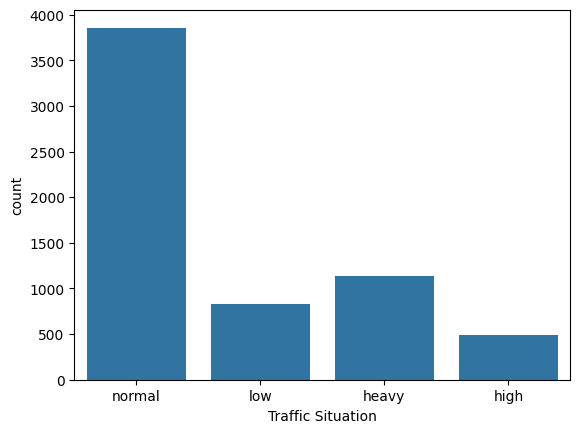

In [9]:
sns.countplot(df, x="Traffic Situation") #count plot for traffic situations

<Axes: xlabel='Day of the week', ylabel='count'>

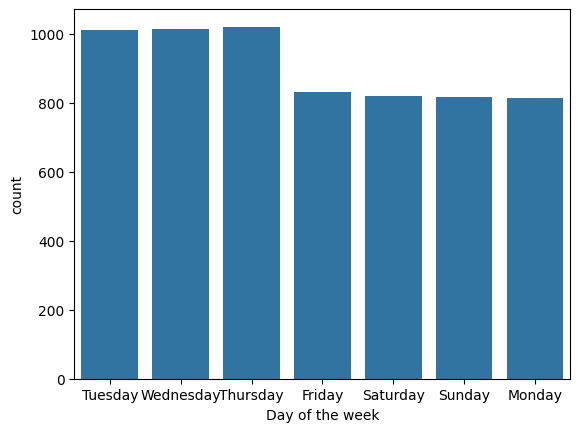

In [10]:
sns.countplot(df, x="Day of the week") # coount plot for day of the week

<ipython-input-11-fcda63851d7a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Situation', y='Total', data=df, palette='Set3')


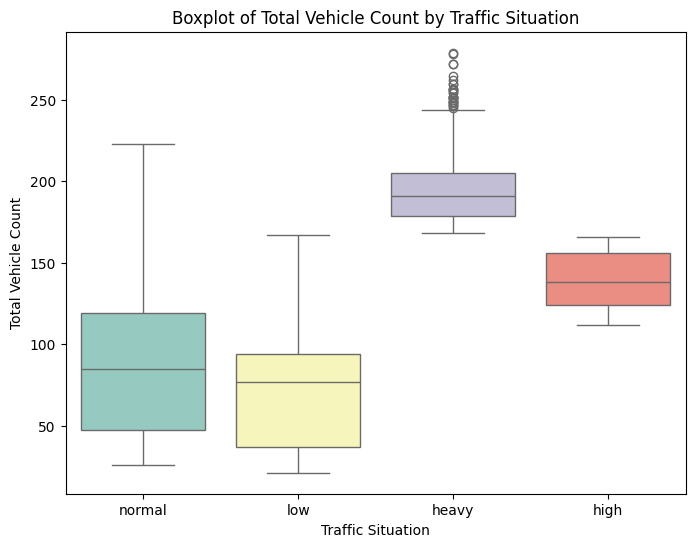

In [11]:
plt.figure(figsize=(8, 6)) #box plot that combines traffic situation with total of vehicles
sns.boxplot(x='Traffic Situation', y='Total', data=df, palette='Set3')
plt.title('Boxplot of Total Vehicle Count by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Total Vehicle Count')
plt.show()

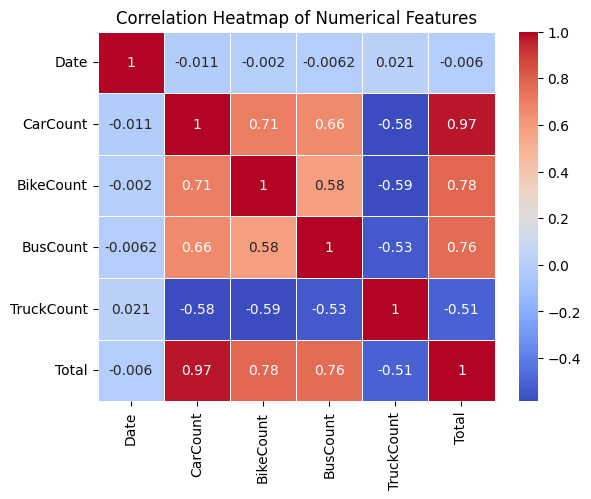

In [12]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [13]:
df.isnull().sum() # chekcing if there is any null vales

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# loop that apply label encoder to each categorical column
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

i did Feature Scaling after spliting data so data leakage will not happen

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [15]:
#defining featrues and target
x= df.drop(columns=['Traffic Situation'])
y= df['Traffic Situation']
from sklearn.preprocessing import StandardScaler

#train  , test , split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y , train_size=0.2 , random_state=42)

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [17]:
#  initialize bagging classifier
from sklearn.ensemble import BaggingClassifier
bg= BaggingClassifier()
bg.fit(X_train , y_train)

BaggingClassifier()

### Evaluate the model performance

In [18]:
# evaluating model using accuracy score and classification report
from sklearn.metrics import accuracy_score , classification_report
bg_y = bg.predict(X_test)
acc_bg = accuracy_score(y_test  , bg_y)
clf_bg = classification_report(y_test , bg_y)

print("accuracy score for bagging is: " , acc_bg )
print('\nClassification report:\n ' , clf_bg)

accuracy score for bagging is:  0.9266798418972332

Classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       910
           1       0.87      0.78      0.83       403
           2       0.78      0.89      0.83       642
           3       0.95      0.93      0.94      3105

    accuracy                           0.93      5060
   macro avg       0.90      0.90      0.90      5060
weighted avg       0.93      0.93      0.93      5060



## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
#  initialize Boosting classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

### Evaluate the model performance

In [20]:
# evaluating model using accuracy score and classification report
gb_y_pred = gb.predict(X_test)
acc_gb = accuracy_score(y_test, gb_y_pred)
clf_gb = classification_report(y_test, gb_y_pred)

print("Accuracy score for Boosting is:", acc_gb)
print('\nClassification report:\n', clf_gb)

Accuracy score for Boosting is: 0.9256916996047431

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       910
           1       0.87      0.77      0.82       403
           2       0.78      0.88      0.83       642
           3       0.94      0.93      0.94      3105

    accuracy                           0.93      5060
   macro avg       0.90      0.90      0.90      5060
weighted avg       0.93      0.93      0.93      5060



## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [21]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


base_models = [
    ('bagging', bg),
    ('boosting', gb)
]


### Define meta-learner (LogisticRegression)

In [22]:
#  initialize stacking and logisitic regression
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [23]:
# Train the StackingClassifier
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('bagging', BaggingClassifier()),
                               ('boosting',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [24]:

# evaluating model using accuracy score and classification report
stacking_y_pred = stacking_clf.predict(X_test)
acc_stacking = accuracy_score(y_test, stacking_y_pred)
clf_stacking = classification_report(y_test, stacking_y_pred)

print("Accuracy score for Stacking is:", acc_stacking)
print('\nClassification report:\n', clf_stacking)


Accuracy score for Stacking is: 0.9243083003952569

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       910
           1       0.87      0.77      0.82       403
           2       0.79      0.85      0.82       642
           3       0.94      0.94      0.94      3105

    accuracy                           0.92      5060
   macro avg       0.90      0.89      0.89      5060
weighted avg       0.93      0.92      0.92      5060



# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

**Feature Selection and Engineering**

1- i think the most importent features were (total vehicle count) , (cat count) , (bike count) , (truck count). they shows how many vehicles are on the road which also shows if traffici is normal or not

2-no i did not create any new features the original features seemed good enough

**Model Selection**

1- they combine different models to make better predictions. Ensemble methods are usually better than single models because they mix/combine different methiods to avoid mistakes and make more accurate predictions.

2-

Bagging accuracy: 0.923

Boosting accuracy: 0.925

Stacking accuracy: 0.926

They all have the same accuracy but the Stacking model performed slightly better. It worked well because it combined both Bagging and Boosting, making it more accurate.

**Model Evaluation**

I used accuracy to see how often the models were right and the classification report to check how well the models predicted each traffic situation. These metrics helped me understand that while all models did well, the Stacking model was the most balanced in predicting different traffic situations correctly.